In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [3]:
topo = xr.open_dataset('/pool/data/MPIOM/GR15/GR15L40_fx.nc')
data = topo['ddpo']

<xarray.DataArray 'ddpo' (time: 1, depth_2: 40, y: 220, x: 256)>
[2252800 values with dtype=float32]
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * depth_2  (depth_2) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
  * time     (time) object 0000-01-01 22:40:00
Dimensions without coordinates: y, x
Attributes:
    long_name:      Ocean level thickness at pressure point
    standard_name:  ocean_level_thickness_at_pressure_point
    units:          m
    code:           192

In [4]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-89.5, 90.5, 1.0), {"units": "degrees_north"}),
        "lon": (["lon"], np.arange(-179.5, 180.5, 1.0), {"units": "degrees_east"}),
    }
)
ds_out

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    *empty*

In [5]:
regridder = xe.Regridder(data, ds_out, "bilinear", periodic=True)

In [6]:
dr_out = regridder(data, keep_attrs=True)

In [7]:
dr_out.to_netcdf("/work/uo1075/u241321/data/thickness_regrid.nc")

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 0-01-01 22:40:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0000-01-01 22:40:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


ValueError: Dimensions {'depth'} do not exist. Expected one or more of ('time', 'depth_2', 'lat', 'lon')

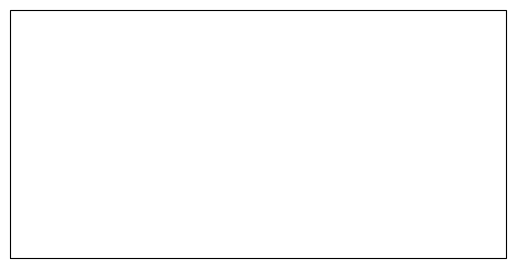

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0, depth=0).plot.pcolormesh(ax=ax)
ax.coastlines()